<a href="https://colab.research.google.com/github/Erman4u/IDS-Machine-Learning/blob/main/UNSW-NB15/UNSW-NB15-Klasifikasi-Biner-No-SMOTETomek.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px



%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load dataset NSL-KDD
train_data = pd.read_csv('/content/drive/MyDrive/Dataset/UNSW_NB15_training-set.csv')
# Melihat beberapa baris data

print(train_data.head())

   id       dur proto service state  spkts  dpkts  sbytes  dbytes       rate  \
0   1  0.121478   tcp       -   FIN      6      4     258     172  74.087490   
1   2  0.649902   tcp       -   FIN     14     38     734   42014  78.473372   
2   3  1.623129   tcp       -   FIN      8     16     364   13186  14.170161   
3   4  1.681642   tcp     ftp   FIN     12     12     628     770  13.677108   
4   5  0.449454   tcp       -   FIN     10      6     534     268  33.373826   

   ...  ct_dst_sport_ltm  ct_dst_src_ltm  is_ftp_login  ct_ftp_cmd  \
0  ...                 1               1             0           0   
1  ...                 1               2             0           0   
2  ...                 1               3             0           0   
3  ...                 1               3             1           1   
4  ...                 1              40             0           0   

   ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  is_sm_ips_ports  attack_cat  \
0                 0   

#EDA

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 175341 non-null  int64  
 1   dur                175341 non-null  float64
 2   proto              175341 non-null  object 
 3   service            175341 non-null  object 
 4   state              175341 non-null  object 
 5   spkts              175341 non-null  int64  
 6   dpkts              175341 non-null  int64  
 7   sbytes             175341 non-null  int64  
 8   dbytes             175341 non-null  int64  
 9   rate               175341 non-null  float64
 10  sttl               175341 non-null  int64  
 11  dttl               175341 non-null  int64  
 12  sload              175341 non-null  float64
 13  dload              175341 non-null  float64
 14  sloss              175341 non-null  int64  
 15  dloss              175341 non-null  int64  
 16  si

In [ ]:
train_data.isnull().sum()

,0
id,0
dur,0
proto,0
service,0
state,0
spkts,0
dpkts,0
sbytes,0
dbytes,0
rate,0


In [ ]:
train_data.nunique()

,0
id,175341
dur,74039
proto,133
service,13
state,9
spkts,480
dpkts,443
sbytes,7214
dbytes,6660
rate,76991


In [ ]:
train_data.duplicated().sum()

np.int64(0)

In [ ]:
isi = train_data['attack_cat'].unique()
isi

array(['Normal', 'Backdoor', 'Analysis', 'Fuzzers', 'Shellcode',
       'Reconnaissance', 'Exploits', 'DoS', 'Worms', 'Generic'],
      dtype=object)

In [ ]:
isi = isi[1:]
isi

array(['Backdoor', 'Analysis', 'Fuzzers', 'Shellcode', 'Reconnaissance',
       'Exploits', 'DoS', 'Worms', 'Generic'], dtype=object)

In [ ]:
train_data['attack_cat'] = train_data['attack_cat'].replace({
    'Normal': 0,
    'Fuzzers': 1, 'DoS': 1, 'Generic': 1,
    'Analysis': 1, 'Reconnaissance': 1,
    'Backdoor': 1, 'Worms': 1,
    'Exploits': 1, 'Shellcode': 1
}).astype(int)


/tmp/ipython-input-10-2888350627.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_data['attack_cat'] = train_data['attack_cat'].replace({


In [ ]:
train_data.head(10)

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,0,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,0,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,0,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,0,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,0,0
5,6,0.380537,tcp,-,FIN,10,6,534,268,39.417980,...,1,40,0,0,0,2,39,0,0,0
6,7,0.637109,tcp,-,FIN,10,8,534,354,26.683033,...,1,40,0,0,0,1,39,0,0,0
7,8,0.521584,tcp,-,FIN,10,8,534,354,32.593026,...,1,40,0,0,0,3,39,0,0,0
8,9,0.542905,tcp,-,FIN,10,8,534,354,31.313031,...,1,40,0,0,0,3,39,0,0,0
9,10,0.258687,tcp,-,FIN,10,6,534,268,57.985135,...,1,40,0,0,0,3,39,0,0,0


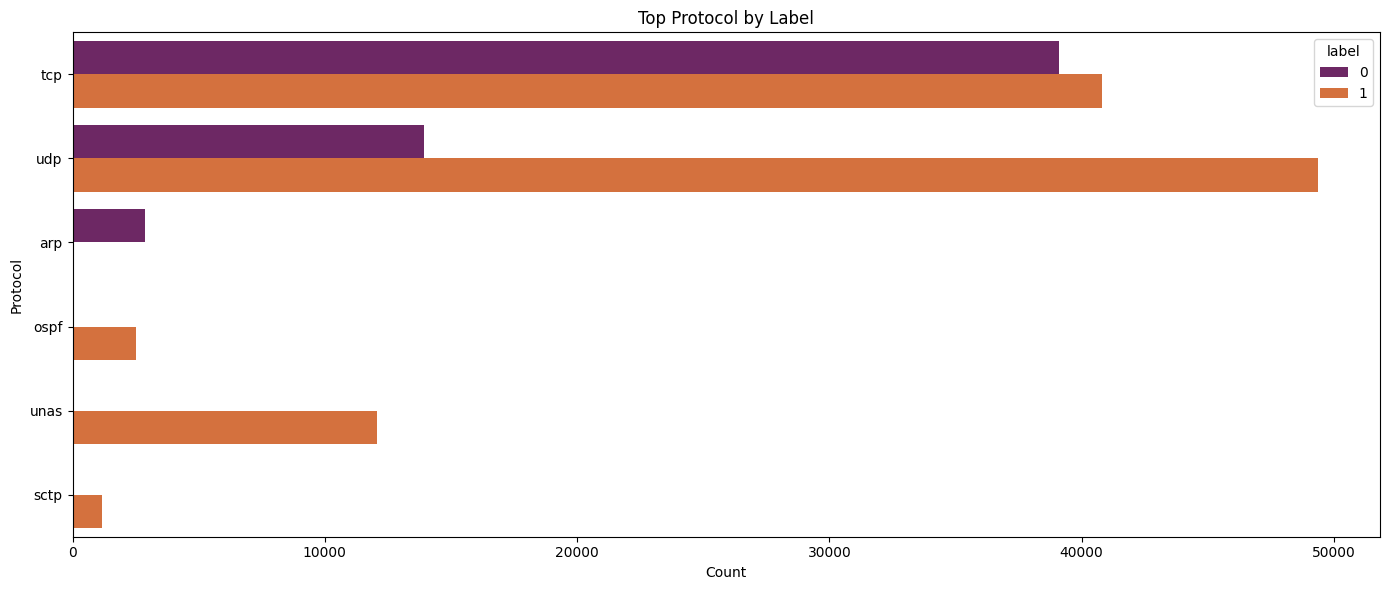

In [ ]:
# Hitung jumlah protokol
proto_counts = train_data['proto'].value_counts()
common_protos = proto_counts[proto_counts > 1000].index

# Filter data
filtered_data = train_data[train_data['proto'].isin(common_protos)]

# Plot ulang
plt.figure(figsize=(14, 6))
sns.countplot(data=filtered_data, y='proto', hue='label', palette='inferno')
plt.title('Top Protocol by Label')
plt.xlabel('Count')
plt.ylabel('Protocol')
plt.tight_layout()
plt.show()


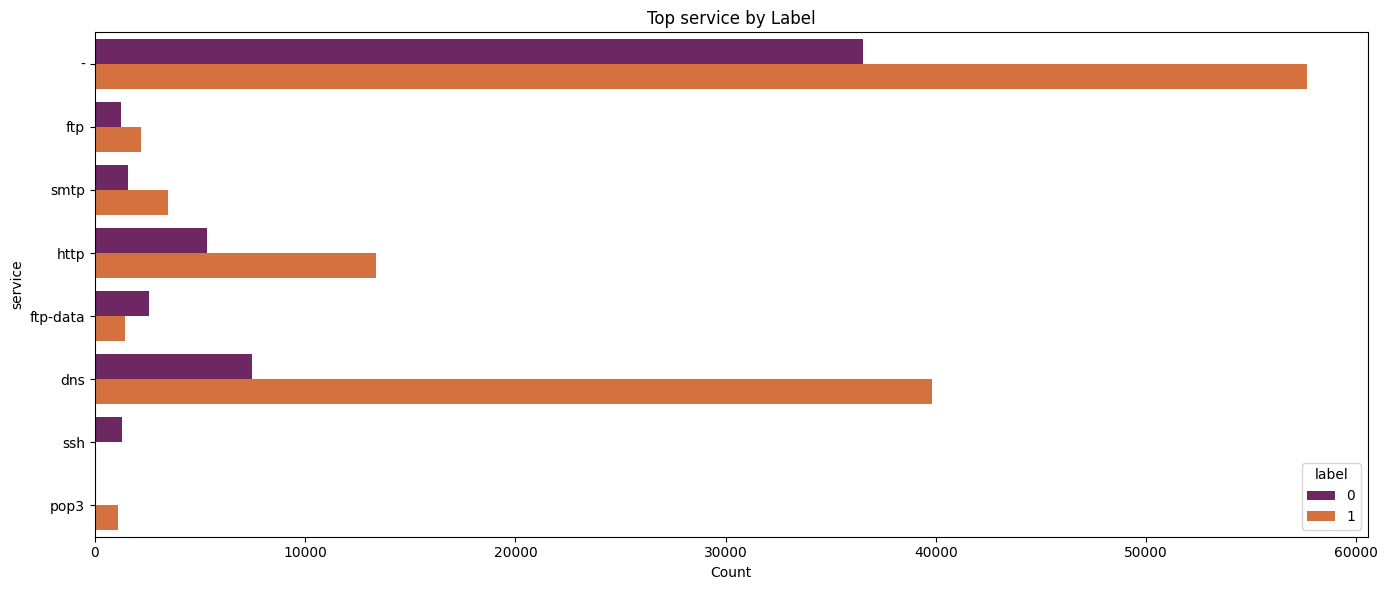

In [ ]:
# Hitung jumlah protokol
service_counts = train_data['service'].value_counts()
service_counts = service_counts[service_counts > 1000].index

# Filter data
filtered_data = train_data[train_data['service'].isin(service_counts)]

# Plot ulang
plt.figure(figsize=(14, 6))
sns.countplot(data=filtered_data, y='service', hue='label', palette='inferno')
plt.title('Top service by Label')
plt.xlabel('Count')
plt.ylabel('service')
plt.tight_layout()
plt.show()



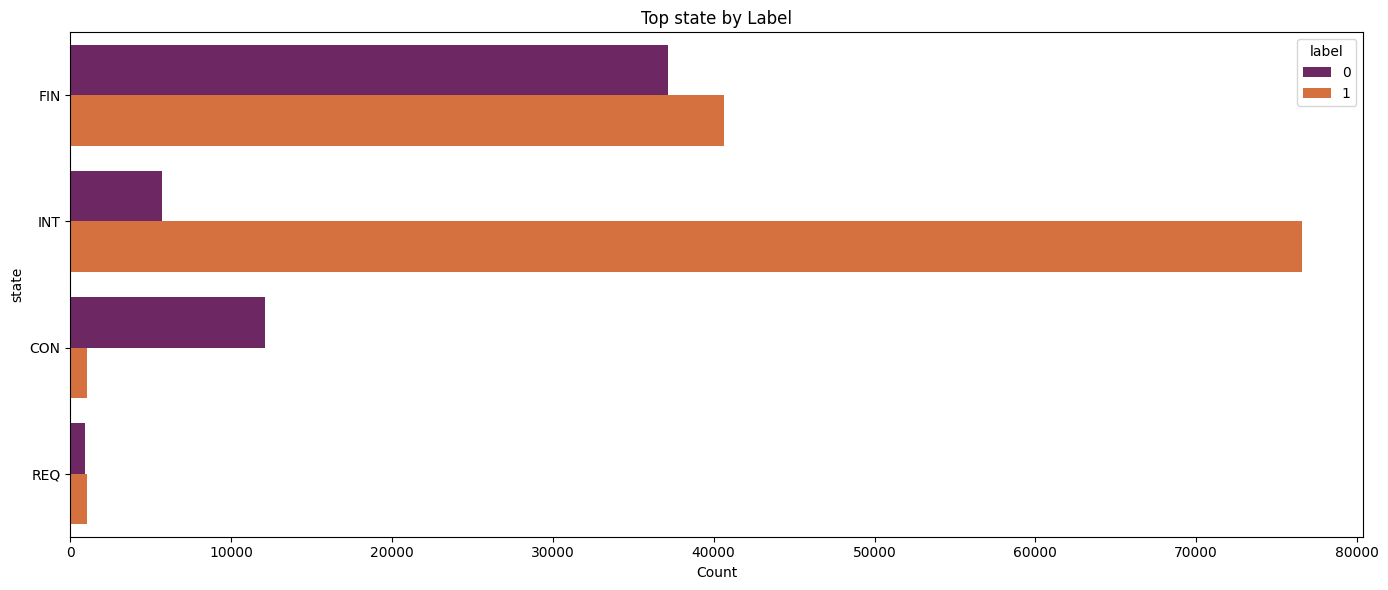

In [ ]:
# Hitung jumlah protokol
service_counts = train_data['state'].value_counts()
service_counts = service_counts[service_counts > 1000].index

# Filter data
filtered_data = train_data[train_data['state'].isin(service_counts)]

# Plot ulang
plt.figure(figsize=(14, 6))
sns.countplot(data=filtered_data, y='state', hue='label', palette='inferno')
plt.title('Top state by Label')
plt.xlabel('Count')
plt.ylabel('state')
plt.tight_layout()
plt.show()



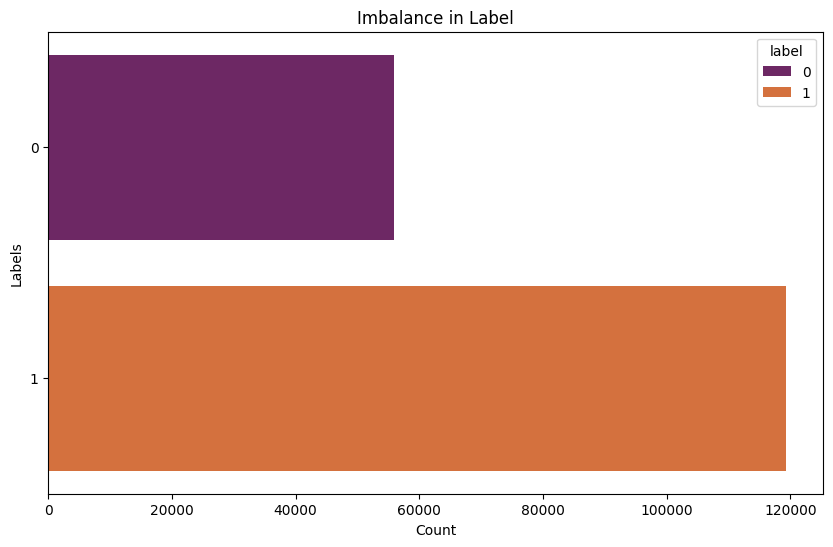

In [ ]:

# Plot imbalance data
plt.figure(figsize=(10, 6))
sns.countplot(y=train_data['label'], hue=train_data['label'], palette="inferno")
plt.title("Imbalance in Label")
plt.xlabel("Count")
plt.ylabel("Labels")
plt.show()

In [ ]:

c = len(train_data.select_dtypes(include=["number"]).columns)
c

42

In [ ]:
col = [
    'id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes', 'dbytes',
    'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
    'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
    'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
    'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
    'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
    'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
    'ct_srv_dst', 'is_sm_ips_ports'
]


In [ ]:
for col in train_data.select_dtypes(include=["object"]):
    print(col)

proto
service
state


In [ ]:
from sklearn.preprocessing import LabelEncoder

cols = ['proto','service','state']

for i in cols:
    en = LabelEncoder()

    train_data[i] = en.fit_transform(train_data[i])

In [ ]:
train_data.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,113,0,2,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,0,0
1,2,0.649902,113,0,2,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,0,0
2,3,1.623129,113,0,2,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,0,0
3,4,1.681642,113,3,2,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,0,0
4,5,0.449454,113,0,2,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,0,0


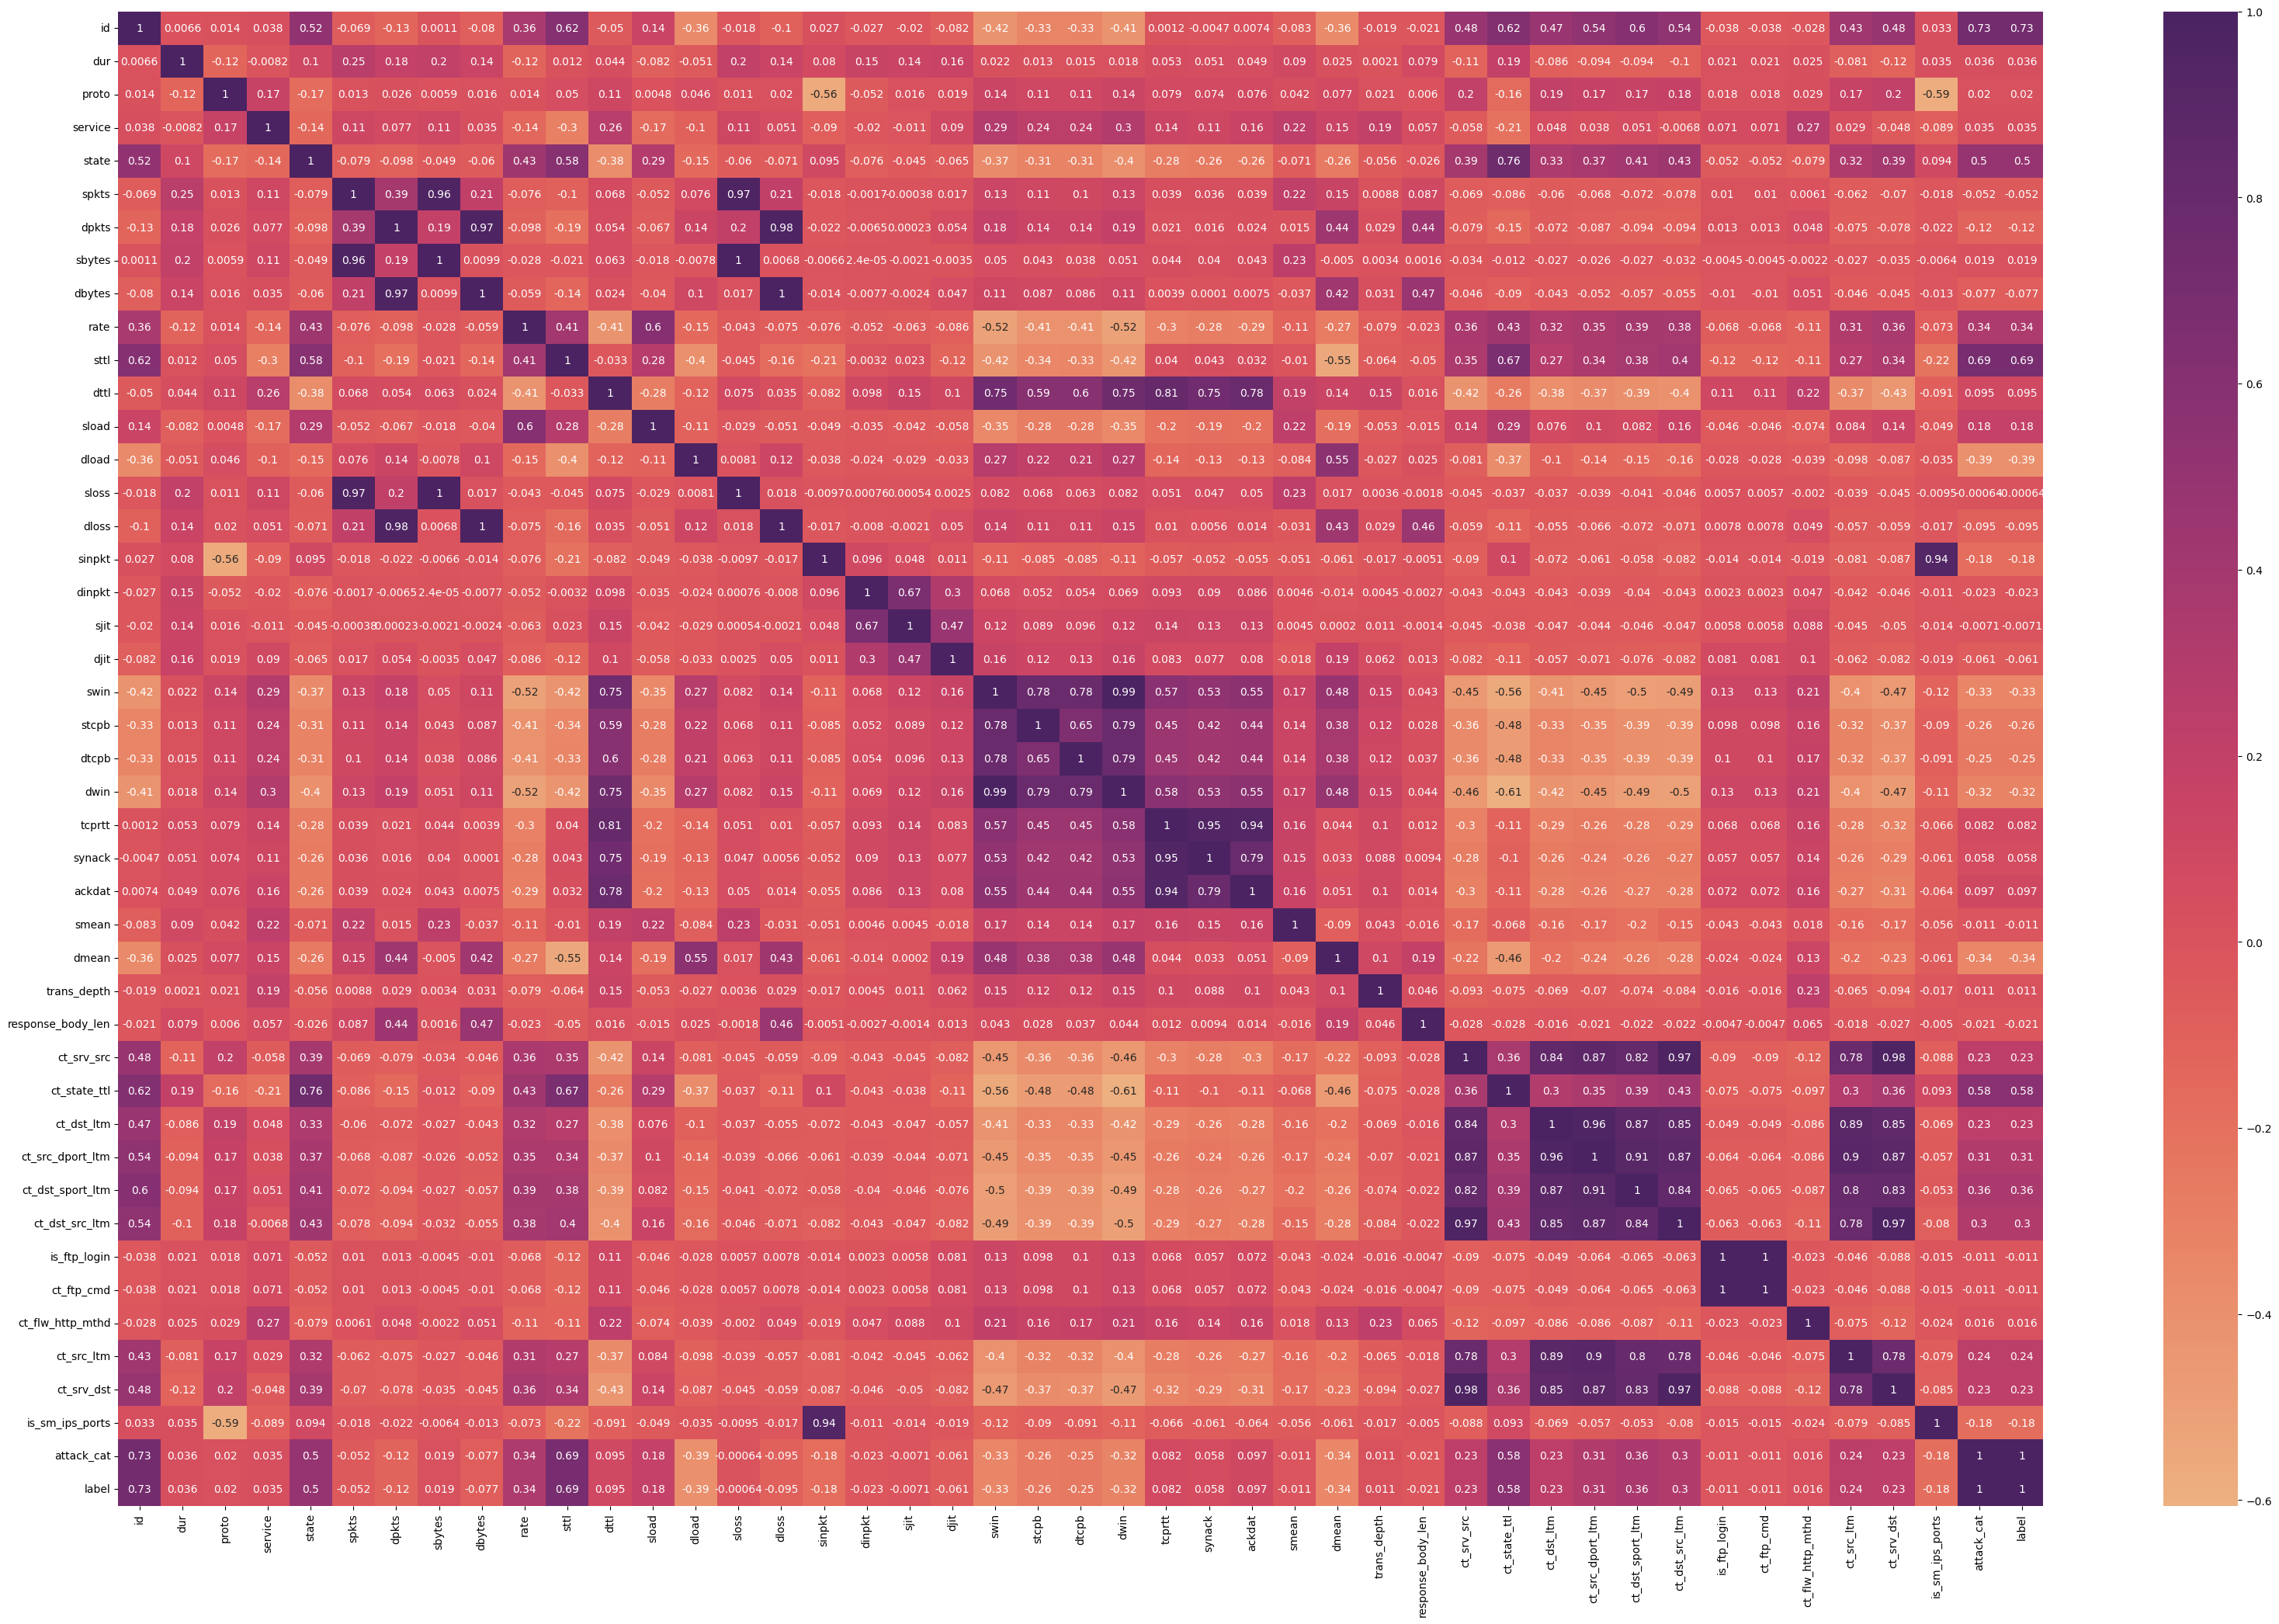

In [ ]:
plt.figure(figsize=(40,25))
sns.heatmap(train_data.corr(),annot= True,cmap = 'flare')
plt.show()

In [ ]:
import pandas as pd
import numpy as np

# Misal data Anda dalam dataframe X
correlation_matrix = train_data.corr()  # Default adalah Pearson


In [ ]:
# Create correlation matrix
corr_matrix = train_data.corr().abs()
corr_matrix

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
id,1.000000,0.006587,0.013943,0.038238,0.518446,0.068827,0.126316,0.001104,0.080283,0.364575,...,0.601158,0.539093,0.037636,0.037636,0.028287,0.425396,0.480899,0.033142,0.727173,0.727173
dur,0.006587,1.000000,0.124502,0.008234,0.103443,0.254559,0.181182,0.199731,0.144134,0.120966,...,0.093923,0.101760,0.020641,0.020641,0.024743,0.080871,0.115336,0.035370,0.036175,0.036175
proto,0.013943,0.124502,1.000000,0.170032,0.172441,0.013469,0.026439,0.005920,0.015812,0.013924,...,0.165796,0.175708,0.018003,0.018003,0.028809,0.168121,0.198594,0.585941,0.020267,0.020267
service,0.038238,0.008234,0.170032,1.000000,0.144978,0.114403,0.077338,0.105188,0.035492,0.141709,...,0.051106,0.006774,0.071051,0.071051,0.266206,0.028599,0.048011,0.088847,0.035052,0.035052
state,0.518446,0.103443,0.172441,0.144978,1.000000,0.078701,0.098268,0.049300,0.059759,0.432307,...,0.408662,0.429906,0.051970,0.051970,0.078856,0.323019,0.387446,0.094198,0.497685,0.497685
spkts,0.068827,0.254559,0.013469,0.114403,0.078701,1.000000,0.390067,0.963791,0.206609,0.076358,...,0.072484,0.077553,0.009951,0.009951,0.006084,0.061584,0.069598,0.017770,0.052178,0.052178
dpkts,0.126316,0.181182,0.026439,0.077338,0.098268,0.390067,1.000000,0.188476,0.971907,0.098202,...,0.094267,0.094085,0.013491,0.013491,0.047974,0.075190,0.078342,0.021765,0.118591,0.118591
sbytes,0.001104,0.199731,0.005920,0.105188,0.049300,0.963791,0.188476,1.000000,0.009926,0.028468,...,0.027281,0.032061,0.004515,0.004515,0.002185,0.027479,0.034553,0.006367,0.018576,0.018576
dbytes,0.080283,0.144134,0.015812,0.035492,0.059759,0.206609,0.971907,0.009926,1.000000,0.059475,...,0.056901,0.054633,0.010460,0.010460,0.051403,0.045594,0.044531,0.013147,0.076871,0.076871
rate,0.364575,0.120966,0.013924,0.141709,0.432307,0.076358,0.098202,0.028468,0.059475,1.000000,...,0.390721,0.383094,0.068140,0.068140,0.109297,0.310876,0.362883,0.072948,0.337979,0.337979


In [ ]:
print("Kolom yang tersedia dalam dataset:")
print(train_data.columns.tolist())

columns_to_drop = [
   'sbytes','proto','trans_depth', 'sloss', 'trans_depth','sjit', 'dinpkt','is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'response_body_len', 'djit', 'tcprtt', 'dinpkt', 'ackdat', 'label']

td_cleaned = train_data.drop(columns=columns_to_drop, errors='ignore')

print("\nKolom setelah dihapus:")
print(td_cleaned.columns.tolist())

Kolom yang tersedia dalam dataset:
['id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label']

Kolom setelah dihapus:
['id', 'dur', 'service', 'state', 'spkts', 'dpkts', 'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'dloss', 'sinpkt', 'swin', 'stcpb', 'dtcpb', 'dwin', 'synack', 'smean', 'dmean', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat']


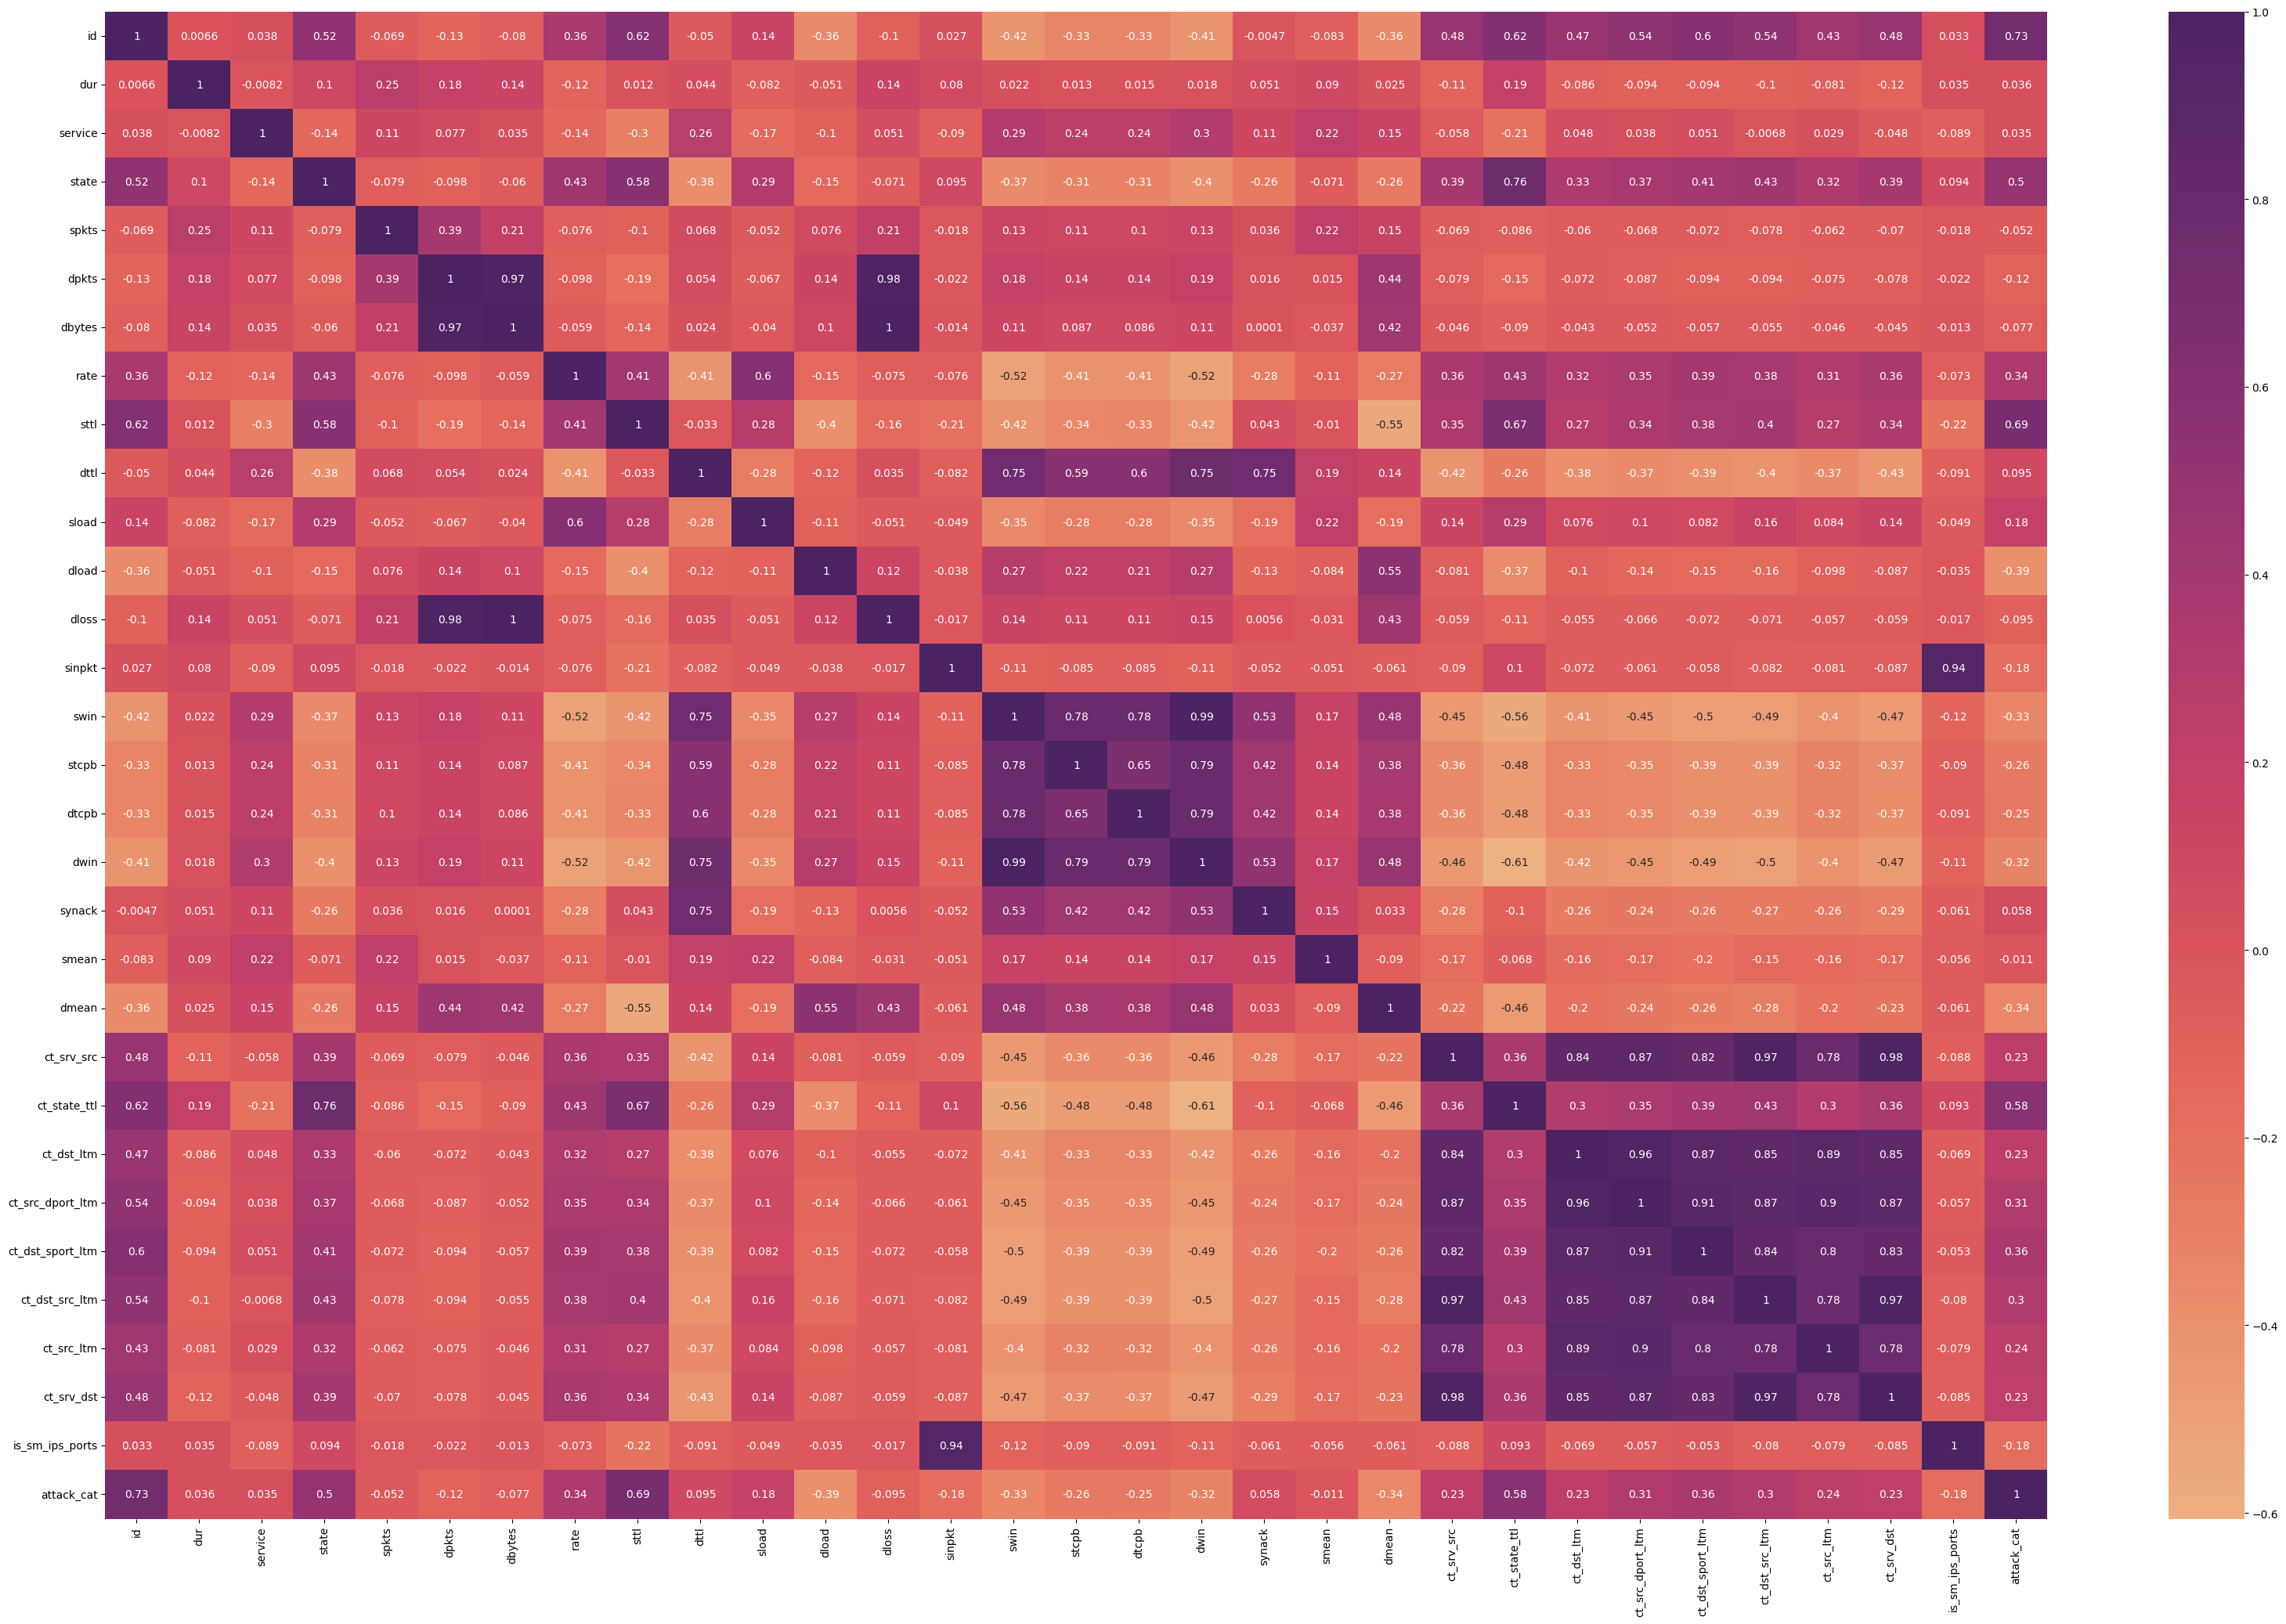

In [ ]:
plt.figure(figsize=(40,25))
sns.heatmap(td_cleaned.corr(),annot= True,cmap = 'flare')
plt.show()

#Scaling Data

In [ ]:
X_trn = td_cleaned.drop(['attack_cat'] , axis = 1).values
Y_trn = td_cleaned['attack_cat'].values

In [ ]:
from sklearn.preprocessing import StandardScaler


In [ ]:
scaler = StandardScaler()

X_trn = scaler.fit_transform(X_trn)

In [ ]:
X_trn.shape


(175341, 30)

In [ ]:
from sklearn.model_selection import train_test_split


#BAGI DATA

In [ ]:
x_trn, x_tst, y_trn, y_tst = train_test_split(X_trn, Y_trn, test_size = 0.20)

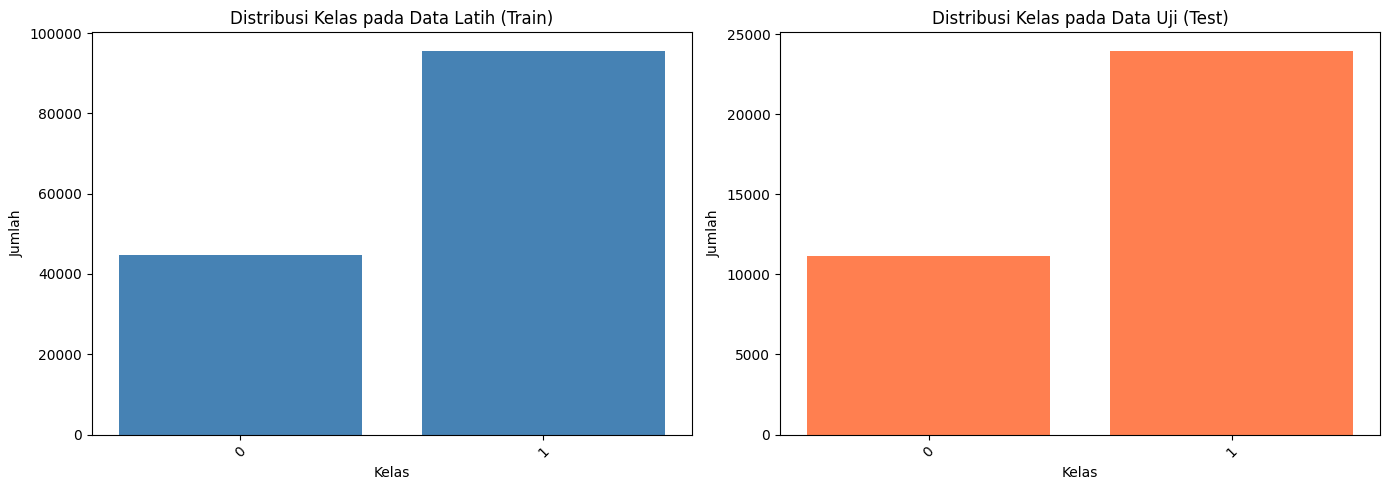

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Ubah ke Series
y_trn_series = pd.Series(y_trn)
y_tst_series = pd.Series(y_tst)

# Hitung distribusi label
train_counts = y_trn_series.value_counts().sort_index()
test_counts = y_tst_series.value_counts().sort_index()

# Buat subplot
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Visualisasi distribusi data latih
axes[0].bar(train_counts.index.astype(str), train_counts.values, color='steelblue')
axes[0].set_title('Distribusi Kelas pada Data Latih (Train)')
axes[0].set_xlabel('Kelas')
axes[0].set_ylabel('Jumlah')
axes[0].tick_params(axis='x', rotation=45)

# Visualisasi distribusi data uji
axes[1].bar(test_counts.index.astype(str), test_counts.values, color='coral')
axes[1].set_title('Distribusi Kelas pada Data Uji (Test)')
axes[1].set_xlabel('Kelas')
axes[1].set_ylabel('Jumlah')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


#TRAINING DATA TANPA CV

=== Logistic Regression ===
Training Accuracy: 0.9512874985741987
Testing Accuracy: 0.9495565884399327
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.89      0.92     11164
           1       0.95      0.98      0.96     23905

    accuracy                           0.95     35069
   macro avg       0.95      0.93      0.94     35069
weighted avg       0.95      0.95      0.95     35069



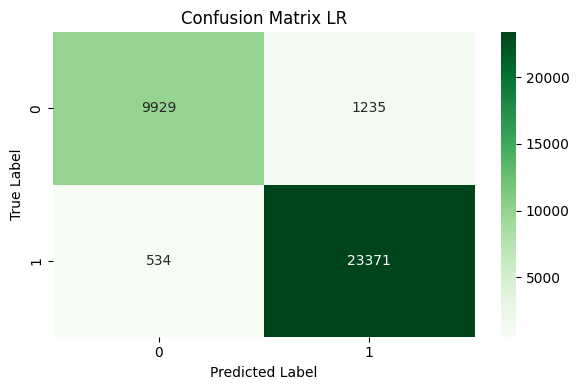

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

# Melatih model
LR = LogisticRegression()
LR.fit(x_trn, y_trn)

# Prediksi
y_train_predlr = LR.predict(x_trn)
y_test_predlr = LR.predict(x_tst)

# Evaluasi
print("=== Logistic Regression ===")
print("Training Accuracy:", metrics.accuracy_score(y_trn, y_train_predlr))
print("Testing Accuracy:", metrics.accuracy_score(y_tst, y_test_predlr))
print("Classification Report:\n", metrics.classification_report(y_tst, y_test_predlr))

# Confusion Matrix
cmlr = metrics.confusion_matrix(y_tst, y_test_predlr)

# Visualisasi Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cmlr, annot=True, fmt='d', cmap='Greens', xticklabels=True, yticklabels=True)
plt.title("Confusion Matrix LR")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()


=== Random Forest ===
Training Accuracy: 1.0
Testing Accuracy: 0.9896204625167527
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98     11074
           1       0.99      1.00      0.99     23995

    accuracy                           0.99     35069
   macro avg       0.99      0.99      0.99     35069
weighted avg       0.99      0.99      0.99     35069



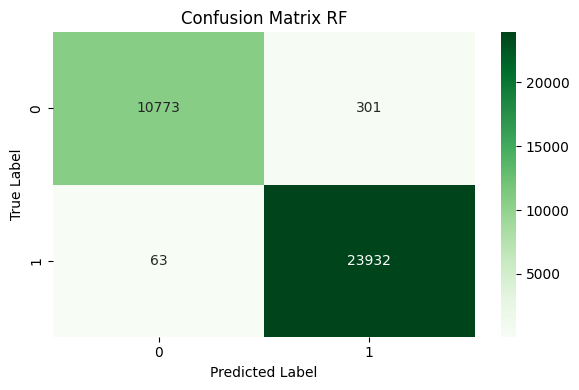

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

RF = RandomForestClassifier()
RF.fit(x_trn, y_trn)

y_train_predrf = RF.predict(x_trn)
y_test_predrf = RF.predict(x_tst)

print("=== Random Forest ===")
print("Training Accuracy:", metrics.accuracy_score(y_trn, y_train_predrf))
print("Testing Accuracy:", metrics.accuracy_score(y_tst, y_test_predrf))
print("Classification Report:\n", metrics.classification_report(y_tst, y_test_predrf))
# Confusion Matrix
cmrf = metrics.confusion_matrix(y_tst, y_test_predrf)

# Visualisasi Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cmrf, annot=True, fmt='d', cmap='Greens', xticklabels=True, yticklabels=True)
plt.title("Confusion Matrix RF")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

=== Support Vector Classifier ===
Training Accuracy: 0.9573685411201095
Testing Accuracy: 0.9565713308049845
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.90      0.93     11074
           1       0.95      0.98      0.97     23995

    accuracy                           0.96     35069
   macro avg       0.96      0.94      0.95     35069
weighted avg       0.96      0.96      0.96     35069



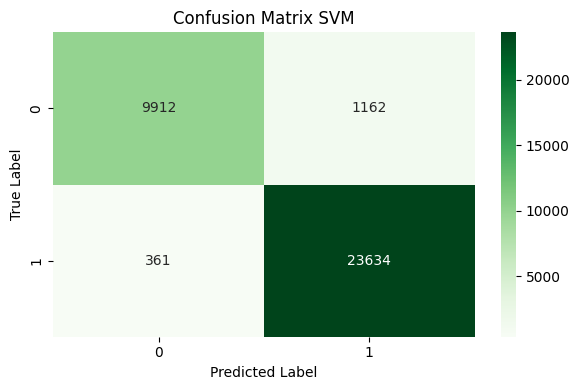

In [ ]:
from sklearn.svm import SVC
from sklearn import metrics

SVM = SVC()
SVM.fit(x_trn, y_trn)

y_train_predsv = SVM.predict(x_trn)
y_test_predsv = SVM.predict(x_tst)

print("=== Support Vector Classifier ===")
print("Training Accuracy:", metrics.accuracy_score(y_trn, y_train_predsv))
print("Testing Accuracy:", metrics.accuracy_score(y_tst, y_test_predsv))
print("Classification Report:\n", metrics.classification_report(y_tst, y_test_predsv))
# Confusion Matrix
cmsv = metrics.confusion_matrix(y_tst, y_test_predsv)

# Visualisasi Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cmsv, annot=True, fmt='d', cmap='Greens', xticklabels=True, yticklabels=True)
plt.title("Confusion Matrix SVM")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

=== Naive Bayes ===
Training Accuracy: 0.9032237367400479
Testing Accuracy: 0.9040463087056945
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.77      0.83     11074
           1       0.90      0.97      0.93     23995

    accuracy                           0.90     35069
   macro avg       0.91      0.87      0.88     35069
weighted avg       0.90      0.90      0.90     35069



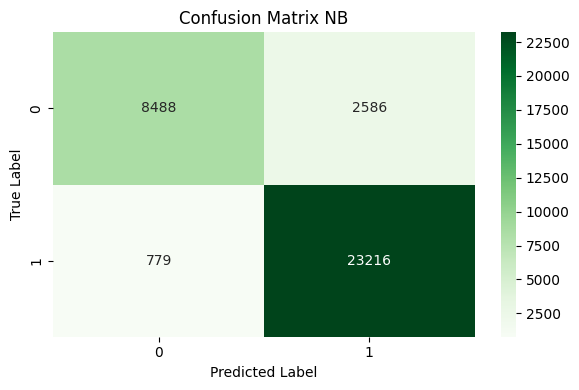

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

NB = GaussianNB()
NB.fit(x_trn, y_trn)

y_train_prednb = NB.predict(x_trn)
y_test_prednb = NB.predict(x_tst)

print("=== Naive Bayes ===")
print("Training Accuracy:", metrics.accuracy_score(y_trn, y_train_prednb))
print("Testing Accuracy:", metrics.accuracy_score(y_tst, y_test_prednb))
print("Classification Report:\n", metrics.classification_report(y_tst, y_test_prednb))

cmnb = metrics.confusion_matrix(y_tst, y_test_prednb)

# Visualisasi Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cmnb, annot=True, fmt='d', cmap='Greens', xticklabels=True, yticklabels=True)
plt.title("Confusion Matrix NB")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

=== K-Nearest Neighbors ===
Training Accuracy: 0.975176799361241
Testing Accuracy: 0.9606775214576977
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.93      0.94     11074
           1       0.97      0.97      0.97     23995

    accuracy                           0.96     35069
   macro avg       0.96      0.95      0.95     35069
weighted avg       0.96      0.96      0.96     35069



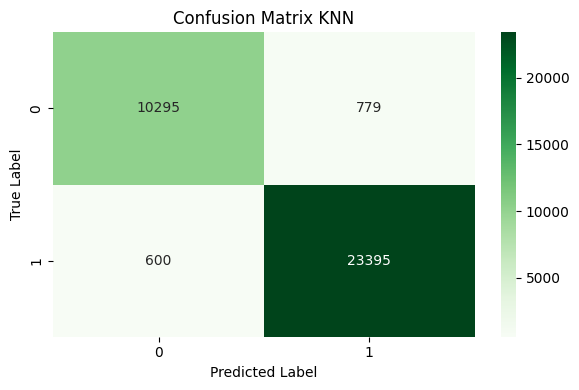

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

KNN = KNeighborsClassifier()
KNN.fit(x_trn, y_trn)

y_train_predkn = KNN.predict(x_trn)
y_test_predkn = KNN.predict(x_tst)

print("=== K-Nearest Neighbors ===")
print("Training Accuracy:", metrics.accuracy_score(y_trn, y_train_predkn))
print("Testing Accuracy:", metrics.accuracy_score(y_tst, y_test_predkn))
print("Classification Report:\n", metrics.classification_report(y_tst, y_test_predkn))
# Confusion Matrix
cmkn = metrics.confusion_matrix(y_tst, y_test_predkn)

# Visualisasi Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cmkn, annot=True, fmt='d', cmap='Greens', xticklabels=True, yticklabels=True)
plt.title("Confusion Matrix KNN")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

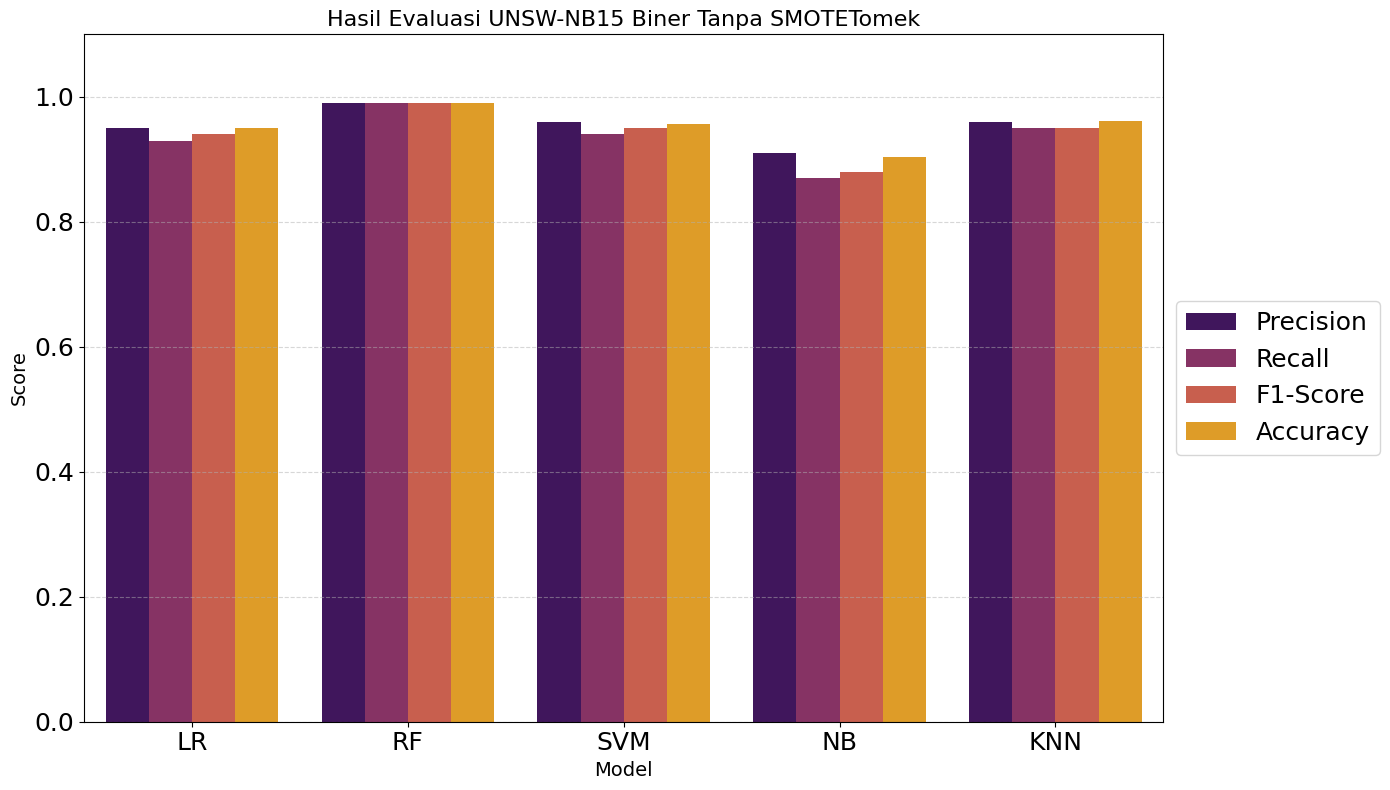

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data macro average dari classification report tanpa GridSearchCV
model_names = ["LR", "RF", "SVM", "NB", "KNN"]

# Update with values from the notebook output for models without GridSearchCV
macro_precision = [0.95, 0.99, 0.96, 0.91, 0.96]
macro_recall = [0.93, 0.99, 0.94, 0.87, 0.95]
macro_f1_score = [0.94, 0.99, 0.95, 0.88, 0.95]
test_accuracy = [0.9496, 0.9896, 0.9566, 0.9040, 0.9607] # Test accuracy from previous output

# Buat DataFrame
df_all_metrics = pd.DataFrame({
    "Model": model_names * 4,
    "Score": macro_precision + macro_recall + macro_f1_score + test_accuracy,
    "Metric": ["Precision"] * len(model_names) + ["Recall"] * len(model_names) + ["F1-Score"] * len(model_names) + ["Accuracy"] * len(model_names)
})

# Buat palet dari colormap 'inferno'
palette = sns.color_palette("inferno", len(df_all_metrics['Metric'].unique()))

# Plot
plt.figure(figsize=(14, 8))
ax = sns.barplot(data=df_all_metrics, x="Model", y="Score", hue="Metric", palette=palette )
plt.title("Hasil Evaluasi UNSW-NB15 Biner Tanpa SMOTETomek", fontsize=16)
plt.ylim(0, 1.1)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=18)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.xticks(fontsize=18) # Increase x-axis label font size
plt.yticks(fontsize=18) # Increase y-axis label font size



plt.tight_layout()
plt.show()

#Menggunakan Gridsearch CV

Best parameters: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
Best CV score: 0.9509
Training Accuracy: 0.9511
Testing Accuracy:  0.9514
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.89      0.92     11074
           1       0.95      0.98      0.97     23995

    accuracy                           0.95     35069
   macro avg       0.95      0.93      0.94     35069
weighted avg       0.95      0.95      0.95     35069



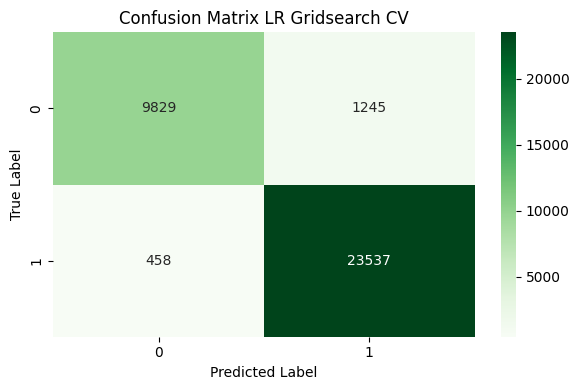

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


lr_model = LogisticRegression(max_iter=1000)
param_gridlr = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'saga']
}

grid_lr = GridSearchCV(lr_model, param_gridlr, cv=5, scoring='accuracy', n_jobs=-1)
grid_lr.fit(x_trn, y_trn)

print("Best parameters:", grid_lr.best_params_)
print(f"Best CV score: {grid_lr.best_score_:.4f}")

# Evaluasi pada data training & testing
best_lr = grid_lr.best_estimator_
y_train_predlrm = best_lr.predict(x_trn)
y_test_predlrm = best_lr.predict(x_tst)

print(f"Training Accuracy: {metrics.accuracy_score(y_trn, y_train_predlrm):.4f}")
print(f"Testing Accuracy:  {metrics.accuracy_score(y_tst, y_test_predlrm):.4f}")
print("Classification Report:\n", metrics.classification_report(y_tst, y_test_predlrm))
# Confusion Matrix
cmlrm = metrics.confusion_matrix(y_tst, y_test_predlrm)

# Visualisasi Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cmlrm, annot=True, fmt='d', cmap='Greens', xticklabels=True, yticklabels=True)
plt.title("Confusion Matrix LR Gridsearch CV")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()


🔍 GridSearchCV for Random Forest...
Best parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best CV score: 0.9896
=== Random Forest ===
Training Accuracy: 0.9993
Testing Accuracy:  0.9897
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98     11074
           1       0.99      1.00      0.99     23995

    accuracy                           0.99     35069
   macro avg       0.99      0.99      0.99     35069
weighted avg       0.99      0.99      0.99     35069



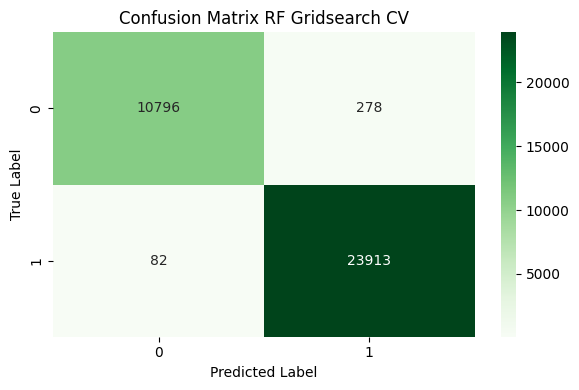

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

print("\n🔍 GridSearchCV for Random Forest...")

rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')
param_gridrfm = {
    'n_estimators': [100, 200],
    'max_depth': [10, None],
    'max_features': ['sqrt'],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]

}

grid_rf = GridSearchCV(rf_model, param_gridrfm, cv=5, scoring='accuracy', n_jobs=-1)
grid_rf.fit(x_trn, y_trn)

print("Best parameters:", grid_rf.best_params_)
print(f"Best CV score: {grid_rf.best_score_:.4f}")

# Evaluasi pada data training & testing
best_rf = grid_rf.best_estimator_
y_train_predrfm = best_rf.predict(x_trn)
y_test_predrfm = best_rf.predict(x_tst)

print("=== Random Forest ===")
print(f"Training Accuracy: {metrics.accuracy_score(y_trn, y_train_predrfm):.4f}")
print(f"Testing Accuracy:  {metrics.accuracy_score(y_tst, y_test_predrfm):.4f}")
print("Classification Report:\n", metrics.classification_report(y_tst, y_test_predrfm))
# Confusion Matrix
cmrfm = metrics.confusion_matrix(y_tst, y_test_predrfm)

# Visualisasi Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cmrfm, annot=True, fmt='d', cmap='Greens', xticklabels=True, yticklabels=True)
plt.title("Confusion Matrix RF Gridsearch CV")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()


🔍 GridSearchCV for Support Vector Machine...


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Best parameters: {'C': 1, 'class_weight': 'balanced', 'gamma': 'scale', 'kernel': 'linear'}
Best CV score: 0.9449
Training Accuracy: 0.9445
Testing Accuracy:  0.9434
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.92      0.91     11164
           1       0.96      0.96      0.96     23905

    accuracy                           0.94     35069
   macro avg       0.93      0.94      0.93     35069
weighted avg       0.94      0.94      0.94     35069



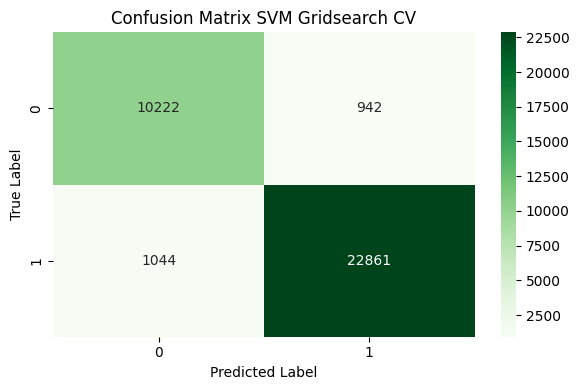

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

print("\n🔍 GridSearchCV for Support Vector Machine...")

svm_model = SVC(max_iter=50000)
param_gridsvm = {
    'C': [0.1, 1],
    'kernel': ['linear'],
    'gamma': ['scale', 'auto'],
    'class_weight': ['balanced']
}

grid_svm = GridSearchCV(svm_model, param_gridsvm, cv=5, scoring='accuracy', n_jobs=-1)
grid_svm.fit(x_trn, y_trn)

print("Best parameters:", grid_svm.best_params_)
print(f"Best CV score: {grid_svm.best_score_:.4f}")

# Evaluasi pada data training & testing
best_svm = grid_svm.best_estimator_
y_train_predsvm = best_svm.predict(x_trn)
y_test_predsvm = best_svm.predict(x_tst)


print(f"Training Accuracy: {metrics.accuracy_score(y_trn, y_train_predsvm):.4f}")
print(f"Testing Accuracy:  {metrics.accuracy_score(y_tst, y_test_predsvm):.4f}")
print("Classification Report:\n", metrics.classification_report(y_tst, y_test_predsvm))
# Confusion Matrix
cmsvm = metrics.confusion_matrix(y_tst, y_test_predsvm)

# Visualisasi Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cmsvm, annot=True, fmt='d', cmap='Greens', xticklabels=True, yticklabels=True)
plt.title("Confusion Matrix SVM Gridsearch CV")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()


🔍 GridSearchCV for Naive Bayes...
Best parameters: {'var_smoothing': 1e-09}
Best CV score: 0.9032
Training Accuracy: 0.9032
Testing Accuracy:  0.9040
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.77      0.83     11074
           1       0.90      0.97      0.93     23995

    accuracy                           0.90     35069
   macro avg       0.91      0.87      0.88     35069
weighted avg       0.90      0.90      0.90     35069



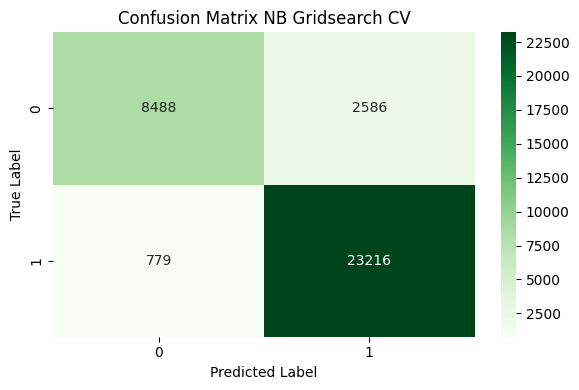

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

print("\n🔍 GridSearchCV for Naive Bayes...")

nb_model = GaussianNB()
param_gridnb = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-7]
}

grid_nb = GridSearchCV(nb_model, param_gridnb, cv=5, scoring='accuracy', n_jobs=-1)
grid_nb.fit(x_trn, y_trn)

print("Best parameters:", grid_nb.best_params_)
print(f"Best CV score: {grid_nb.best_score_:.4f}")

# Evaluasi pada data training & testing
best_nb = grid_nb.best_estimator_
y_train_prednb = best_nb.predict(x_trn)
y_test_prednb = best_nb.predict(x_tst)

print(f"Training Accuracy: {metrics.accuracy_score(y_trn, y_train_prednb):.4f}")
print(f"Testing Accuracy:  {metrics.accuracy_score(y_tst, y_test_prednb):.4f}")
print("Classification Report:\n", metrics.classification_report(y_tst, y_test_prednb))
# Confusion Matrix
cmnb = metrics.confusion_matrix(y_tst, y_test_prednb)

# Visualisasi Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cmnb, annot=True, fmt='d', cmap='Greens', xticklabels=True, yticklabels=True)
plt.title("Confusion Matrix NB Gridsearch CV")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()



🔍 GridSearchCV for K-Nearest Neighbors...
Best parameters: {'metric': 'manhattan', 'n_neighbors': 10, 'weights': 'distance'}
Best CV score: 0.9702
Training Accuracy: 1.0000
Testing Accuracy:  0.9699
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.95     11074
           1       0.98      0.98      0.98     23995

    accuracy                           0.97     35069
   macro avg       0.97      0.96      0.97     35069
weighted avg       0.97      0.97      0.97     35069



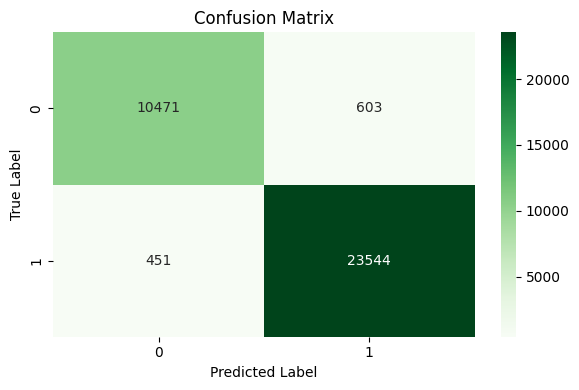

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

print("\n🔍 GridSearchCV for K-Nearest Neighbors...")

knn_model = KNeighborsClassifier()
param_gridknn = {
    'n_neighbors': [3, 5, 10],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_knn = GridSearchCV(knn_model, param_gridknn, cv=5, scoring='accuracy', n_jobs=-1)
grid_knn.fit(x_trn, y_trn)

print("Best parameters:", grid_knn.best_params_)
print(f"Best CV score: {grid_knn.best_score_:.4f}")

# Evaluasi pada data training & testing
best_knn = grid_knn.best_estimator_
y_train_predknn = best_knn.predict(x_trn)
y_test_predknn = best_knn.predict(x_tst)

print(f"Training Accuracy: {metrics.accuracy_score(y_trn, y_train_predknn):.4f}")
print(f"Testing Accuracy:  {metrics.accuracy_score(y_tst, y_test_predknn):.4f}")
print("Classification Report:\n", metrics.classification_report(y_tst, y_test_predknn))
# Confusion Matrix
cmknn = metrics.confusion_matrix(y_tst, y_test_predknn)

# Visualisasi Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cmknn, annot=True, fmt='d', cmap='Greens', xticklabels=True, yticklabels=True)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

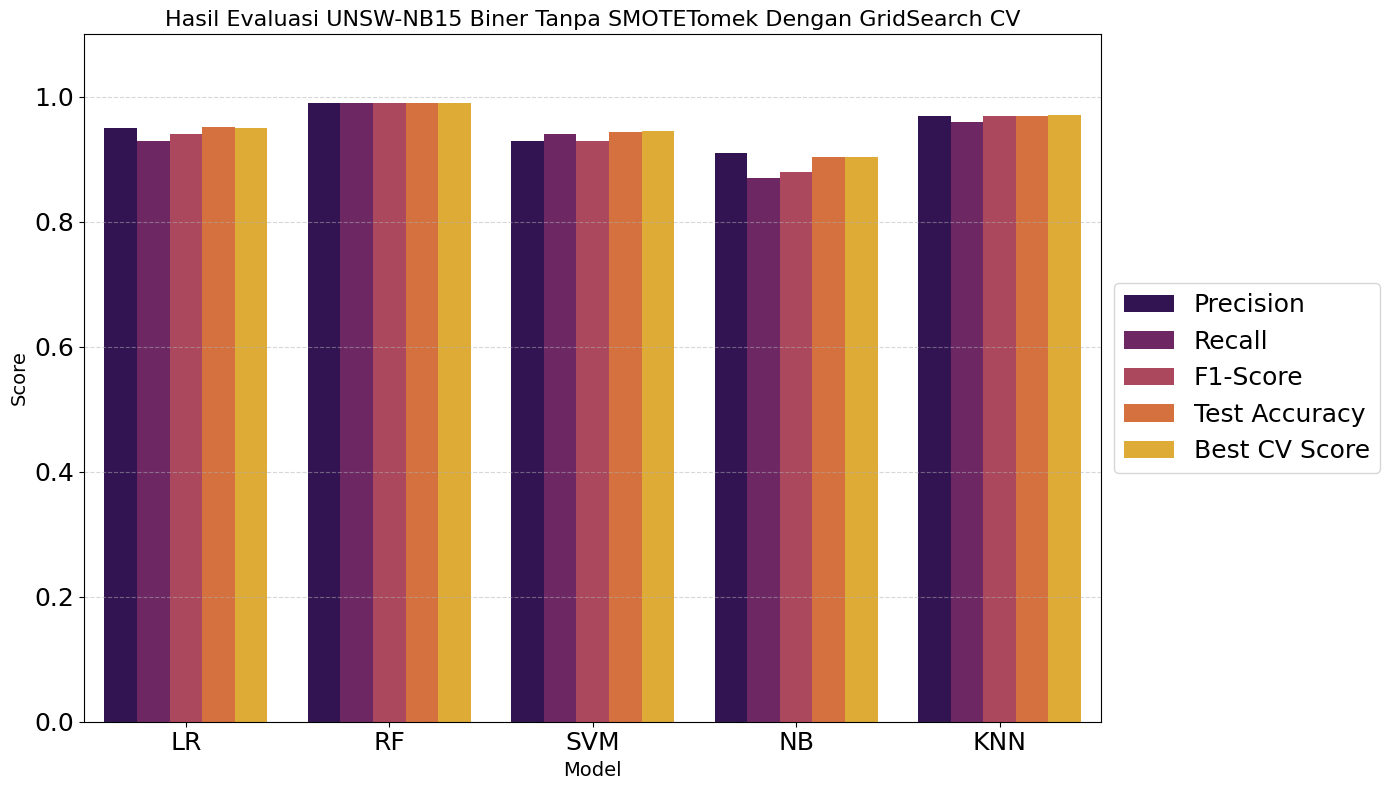

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data dari hasil GridSearchCV yang diambil dari output sel sebelumnya
model_names = ["LR", "RF", "SVM", "NB", "KNN"]

# Macro averages from Classification Reports (Testing Data after GridSearchCV)
# Extracted from the outputs of cells ebyszuHU0GEt, TPqVcJBy0F91, Q799FcJV0F6U, vRb1kgG_0F28, 288hjRtT0Fza
macro_precision = [0.95, 0.99, 0.93, 0.91, 0.97]
macro_recall = [0.93, 0.99, 0.94, 0.87, 0.96]
macro_f1_score = [0.94, 0.99, 0.93, 0.88, 0.97]

# Test accuracies from GridSearchCV outputs
# Extracted from the outputs of cells ebyszuHU0GEt, TPqVcJBy0F91, Q799FcJV0F6U, vRb1kgG_0F28, 288hjRtT0Fza
test_accuracies = [0.9514, 0.9897, 0.9434, 0.9040, 0.9699]

# Best CV scores from GridSearchCV outputs
# Extracted from the outputs of cells ebyszuHU0GEt, TPqVcJBy0F91, Q799FcJV0F6U, vRb1kgG_0F28, 288hjRtT0Fza
best_cv_scores = [0.9509, 0.9896, 0.9449, 0.9032, 0.9702]


# Buat DataFrame
df_all_metrics = pd.DataFrame({
    "Model": model_names * 5,
    "Score": macro_precision + macro_recall + macro_f1_score + test_accuracies + best_cv_scores,
    "Metric": ["Precision"] * len(model_names) + ["Recall"] * len(model_names) + ["F1-Score"] * len(model_names) + ["Test Accuracy"] * len(model_names) + ["Best CV Score"] * len(model_names)
})

# Buat palet dari colormap 'inferno'
palette = sns.color_palette("inferno", len(df_all_metrics['Metric'].unique()))

# Plot
plt.figure(figsize=(14, 8))
ax = sns.barplot(data=df_all_metrics, x="Model", y="Score", hue="Metric", palette=palette )
plt.title("Hasil Evaluasi UNSW-NB15 Biner Tanpa SMOTETomek Dengan GridSearch CV", fontsize=16)
plt.ylim(0, 1.1)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=18)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.xticks(fontsize=18) # Increase x-axis label font size
plt.yticks(fontsize=18) # Increase y-axis label font size



plt.tight_layout()
plt.show()

#Ekspor Impor Model


In [ ]:
# Ambil model terbaik dan prediksi
best_svm = grid_svm.best_estimator_
y_test_pred = best_svm.predict(x_tst)

In [ ]:
best_lr = grid_lr.best_estimator_
y_test_pred = best_lr.predict(x_tst)

In [ ]:
best_rf = grid_rf.best_estimator_
y_test_pred = best_rf.predict(x_tst)

In [ ]:
best_nb = grid_nb.best_estimator_
y_test_pred = best_nb.predict(x_tst)

In [ ]:
best_knn = grid_knn.best_estimator_
y_test_pred = best_knn.predict(x_tst)

In [ ]:
import joblib
joblib.dump(best_svm, "SVM UNSW BNS.pkl")
joblib.dump(scaler, 'scaler UNSW BNS.pkl')
joblib.dump(best_lr, "LR UNSW BNS.pkl"  )
joblib.dump(best_rf, "RF UNSW BNS.pkl"  )
joblib.dump(best_nb, "NB UNSW BNS.pkl"  )
joblib.dump(best_knn, "KNN UNSW BNS.pkl"  )

['KNN UNSW BNS.pkl']

In [ ]:
import os
print(os.listdir())

['.config', 'drive', 'RF UNSW BNS.pkl', 'NB UNSW BNS.pkl', 'SVM UNSW BNS.pkl', 'LR UNSW BNS.pkl', 'KNN UNSW BNS.pkl', 'scaler UNSW BNS.pkl', 'sample_data']


In [ ]:
import joblib

model_svm = joblib.load("SVM UNSW BNS.pkl")
scaler = joblib.load('scaler UNSW BNS.pkl')
model_lr = joblib.load("LR UNSW BNS.pkl")
model_rf = joblib.load("RF UNSW BNS.pkl")
model_nb = joblib.load("NB UNSW BNS.pkl")
model_knn = joblib.load("KNN UNSW BNS.pkl")

#Load data Kdd_Test

In [ ]:
test_data = pd.read_csv("/content/drive/MyDrive/Dataset/UNSW_NB15_testing-set.csv")

#Bersihin Data

In [ ]:
c = len(test_data.select_dtypes(include=["number"]).columns)
c

41

In [ ]:
test_data['attack_cat'] = test_data['attack_cat'].replace({
    'Normal': 0,
    'Fuzzers': 1, 'DoS': 1, 'Generic': 1,
    'Analysis': 1, 'Reconnaissance': 1,
    'Backdoor': 1, 'Worms': 1,
    'Exploits': 1, 'Shellcode': 1
}).astype(int)


/tmp/ipython-input-57-1100288890.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_data['attack_cat'] = test_data['attack_cat'].replace({


In [ ]:
col = [
    'id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes', 'dbytes',
    'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
    'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
    'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
    'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
    'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
    'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
    'ct_srv_dst', 'is_sm_ips_ports'
]


In [ ]:
for col in train_data.select_dtypes(include=["object"]):
    print(col)

In [ ]:
from sklearn.preprocessing import LabelEncoder

cols = ['proto','service','state']

for i in cols:
    en = LabelEncoder()

    test_data[i] = en.fit_transform(test_data[i])

In [ ]:
print("Kolom yang tersedia dalam dataset:")
print(test_data.columns.tolist())

columns_to_drop = [
    'sbytes','proto','trans_depth', 'sloss', 'trans_depth','sjit', 'dinpkt','is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'response_body_len', 'djit', 'tcprtt', 'dinpkt', 'ackdat', 'label'
]

ts_cleaned = test_data.drop(columns=columns_to_drop, errors='ignore')

print("\nKolom setelah dihapus:")
print(ts_cleaned.columns.tolist())

Kolom yang tersedia dalam dataset:
['id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label']

Kolom setelah dihapus:
['id', 'dur', 'service', 'state', 'spkts', 'dpkts', 'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'dloss', 'sinpkt', 'swin', 'stcpb', 'dtcpb', 'dwin', 'synack', 'smean', 'dmean', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat']


In [ ]:
Xs_trn = ts_cleaned.drop(['attack_cat'] , axis = 1).values


In [ ]:
print(Xs_trn.shape)
print(ts_cleaned.shape)


(82332, 30)
(82332, 31)


In [ ]:
ts_cleaned.head()

,id,dur,service,state,spkts,dpkts,dbytes,rate,sttl,dttl,...,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat
0,1,0.000011,0,4,2,0,0,90909.0902,254,0,...,2,2,1,1,1,2,1,2,0,0
1,2,0.000008,0,4,2,0,0,125000.0003,254,0,...,2,2,1,1,1,2,1,2,0,0
2,3,0.000005,0,4,2,0,0,200000.0051,254,0,...,3,2,1,1,1,3,1,3,0,0
3,4,0.000006,0,4,2,0,0,166666.6608,254,0,...,3,2,2,2,1,3,2,3,0,0
4,5,0.000010,0,4,2,0,0,100000.0025,254,0,...,3,2,2,2,1,3,2,3,0,0


#Test Model Pada Data Baru



In [ ]:
from sklearn.preprocessing import StandardScaler


X_train_scaled = scaler.fit_transform(x_trn)
X_test_scaled = scaler.transform(Xs_trn)                # data test

# Kalau pakai label juga:
y_train = y_trn


=== Logistic Regression (Best Model) ===
              precision    recall  f1-score   support

           0       0.44      0.91      0.59     37000
           1       0.42      0.05      0.09     45332

    accuracy                           0.44     82332
   macro avg       0.43      0.48      0.34     82332
weighted avg       0.43      0.44      0.32     82332



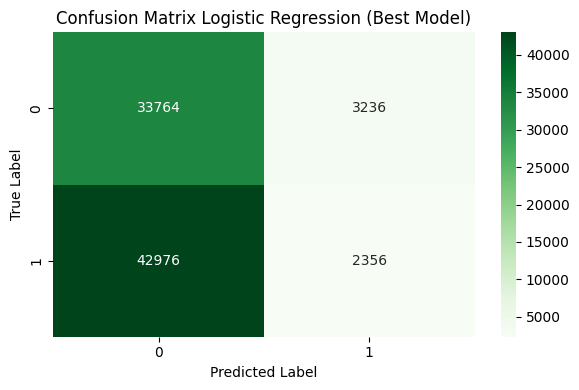

In [ ]:
# Asumsi model_lr dan scaler sudah dimuat di sel sebelumnya (k1N2mFa76wyz)
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Pisahkan fitur dan label (ini sudah benar)
X_train = td_cleaned.drop(columns=['attack_cat'])
y_train = td_cleaned['attack_cat']

X_test = ts_cleaned.drop(columns=['attack_cat'])
y_test = ts_cleaned['attack_cat']

# Pastikan kolomnya konsisten (ini sudah benar)
X_test = X_test[X_train.columns]

# Konversi X_test menjadi NumPy array sebelum diskalakan
X_test_array = X_test.values

# Gunakan scaler yang sudah dimuat untuk mentransformasi data test
X_test_scaled = scaler.transform(X_test_array)

# Gunakan model Logistic Regression terbaik yang sudah dimuat untuk prediksi
y_pred_lr = model_lr.predict(X_test_scaled)

# Evaluasi
print("=== Logistic Regression (Best Model) ===")
print(classification_report(y_test, y_pred_lr))

# Visualisasi Confusion Matrix
cmlr_loaded = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(6, 4))
sns.heatmap(cmlr_loaded, annot=True, fmt='d', cmap='Greens', xticklabels=True, yticklabels=True)
plt.title("Confusion Matrix Logistic Regression (Best Model)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

=== Random Forest (Best Model) ===
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     37000
           1       0.55      1.00      0.71     45332

    accuracy                           0.55     82332
   macro avg       0.28      0.50      0.36     82332
weighted avg       0.30      0.55      0.39     82332



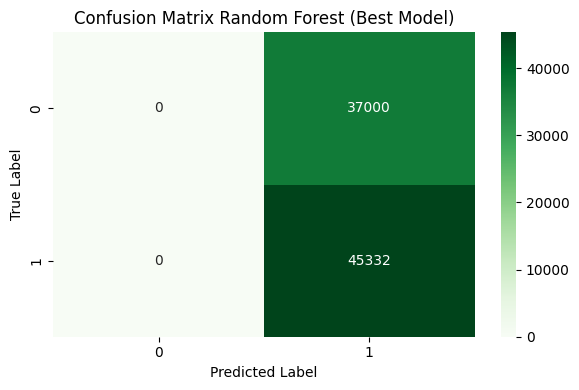

In [ ]:
# Asumsi model_rf dan scaler sudah dimuat di sel sebelumnya (k1N2mFa76wyz)
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Pisahkan fitur dan label (ini sudah benar)
X_train = td_cleaned.drop(columns=['attack_cat'])
y_train = td_cleaned['attack_cat']

X_test = ts_cleaned.drop(columns=['attack_cat'])
y_test = ts_cleaned['attack_cat']

# Pastikan kolomnya konsisten (ini sudah benar)
X_test = X_test[X_train.columns]

# Konversi X_test menjadi NumPy array sebelum diskalakan
X_test_array = X_test.values


# Gunakan scaler yang sudah dimuat untuk mentransformasi data test
X_test_scaled = scaler.transform(X_test_array)

# Gunakan model Random Forest terbaik yang sudah dimuat untuk prediksi
y_pred_rf = model_rf.predict(X_test_scaled)

# Evaluasi
print("=== Random Forest (Best Model) ===")
print(classification_report(y_test, y_pred_rf))

# Visualisasi Confusion Matrix
cmrf_loaded = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(cmrf_loaded, annot=True, fmt='d', cmap='Greens', xticklabels=True, yticklabels=True)
plt.title("Confusion Matrix Random Forest (Best Model)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

=== Support Vector Machine (Best Model) ===
              precision    recall  f1-score   support

           0       0.44      0.90      0.59     37000
           1       0.44      0.07      0.11     45332

    accuracy                           0.44     82332
   macro avg       0.44      0.48      0.35     82332
weighted avg       0.44      0.44      0.33     82332



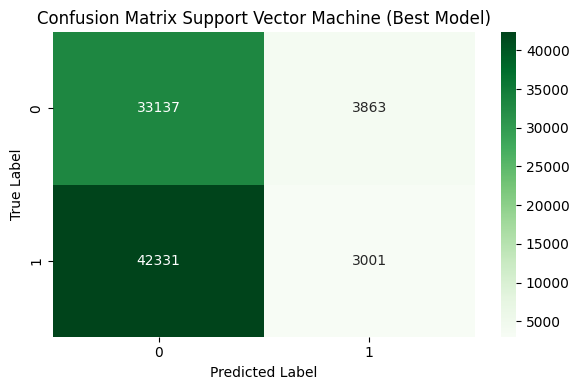

In [ ]:
# Asumsi model_svm dan scaler sudah dimuat di sel sebelumnya (k1N2mFa76wyz)
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Pisahkan fitur dan label (ini sudah benar)
X_train = td_cleaned.drop(columns=['attack_cat'])
y_train = td_cleaned['attack_cat']

X_test = ts_cleaned.drop(columns=['attack_cat'])
y_test = ts_cleaned['attack_cat']

# Pastikan kolomnya konsisten (ini sudah benar)
X_test = X_test[X_train.columns]

# Konversi X_test menjadi NumPy array sebelum diskalakan
X_test_array = X_test.values

# Gunakan scaler yang sudah dimuat untuk mentransformasi data test
X_test_scaled = scaler.transform(X_test_array)

# Gunakan model SVM terbaik yang sudah dimuat untuk prediksi
y_pred_svm = model_svm.predict(X_test_scaled)

# Evaluasi
print("=== Support Vector Machine (Best Model) ===")
print(classification_report(y_test, y_pred_svm))

# Visualisasi Confusion Matrix
cmsvm_loaded = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(6, 4))
sns.heatmap(cmsvm_loaded, annot=True, fmt='d', cmap='Greens', xticklabels=True, yticklabels=True)
plt.title("Confusion Matrix Support Vector Machine (Best Model)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

=== Naive Bayes (Best Model) ===
              precision    recall  f1-score   support

           0       0.67      0.86      0.75     37000
           1       0.85      0.66      0.74     45332

    accuracy                           0.75     82332
   macro avg       0.76      0.76      0.75     82332
weighted avg       0.77      0.75      0.75     82332



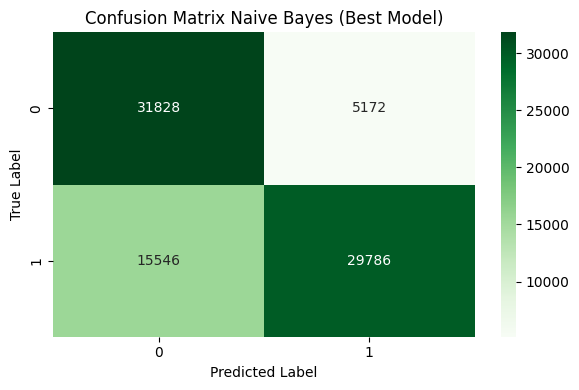

In [ ]:
# Asumsi model_nb dan scaler sudah dimuat di sel sebelumnya (k1N2mFa76wyz)
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Pisahkan fitur dan label (ini sudah benar)
X_train = td_cleaned.drop(columns=['attack_cat'])
y_train = td_cleaned['attack_cat']

X_test = ts_cleaned.drop(columns=['attack_cat'])
y_test = ts_cleaned['attack_cat']

# Pastikan kolomnya konsisten (ini sudah benar)
X_test = X_test[X_train.columns]

# Konversi X_test menjadi NumPy array sebelum diskalakan
X_test_array = X_test.values

# Gunakan scaler yang sudah dimuat untuk mentransformasi data test
X_test_scaled = scaler.transform(X_test_array)

# Use the loaded Naive Bayes best model for prediction
y_pred_nb = model_nb.predict(X_test_scaled)

# Evaluate
print("=== Naive Bayes (Best Model) ===")
print(classification_report(y_test, y_pred_nb))

# Confusion Matrix
cmnb_loaded = confusion_matrix(y_test, y_pred_nb)

# Visualize Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cmnb_loaded, annot=True, fmt='d', cmap='Greens', xticklabels=True, yticklabels=True)
plt.title("Confusion Matrix Naive Bayes (Best Model)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

=== K-Nearest Neighbors (Best Model) ===
              precision    recall  f1-score   support

           0       0.54      0.64      0.59     37000
           1       0.65      0.55      0.60     45332

    accuracy                           0.59     82332
   macro avg       0.59      0.60      0.59     82332
weighted avg       0.60      0.59      0.59     82332



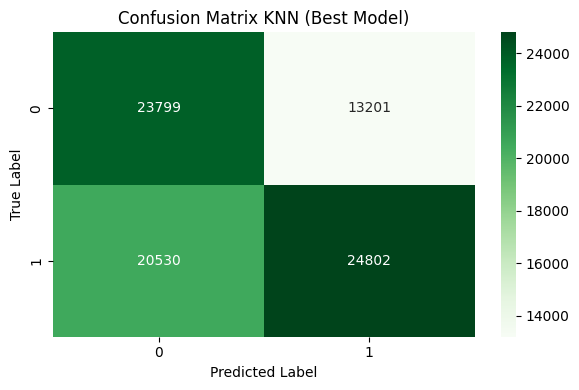

In [ ]:
# Asumsi model_knn dan scaler sudah dimuat di sel sebelumnya (k1N2mFa76wyz)
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Pisahkan fitur dan label (ini sudah benar)
X_train = td_cleaned.drop(columns=['attack_cat'])
y_train = td_cleaned['attack_cat']

X_test = ts_cleaned.drop(columns=['attack_cat'])
y_test = ts_cleaned['attack_cat']

# Pastikan kolomnya konsisten (ini sudah benar)
X_test = X_test[X_train.columns]

# Konversi X_test menjadi NumPy array sebelum diskalakan
X_test_array = X_test.values

# Gunakan scaler yang sudah dimuat untuk mentransformasi data test
X_test_scaled = scaler.transform(X_test_array)

# Use the loaded KNN best model for prediction
y_pred_knn = model_knn.predict(X_test_scaled)

# Evaluate
print("=== K-Nearest Neighbors (Best Model) ===")
print(classification_report(y_test, y_pred_knn))

# Confusion Matrix
cmknn_loaded = confusion_matrix(y_test, y_pred_knn)

# Visualize Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cmknn_loaded, annot=True, fmt='d', cmap='Greens', xticklabels=True, yticklabels=True)
plt.title("Confusion Matrix KNN (Best Model)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

def predict_realtime_lr():
    input_dict = {}

    # Daftar kolom dan tipe data (sesuai dengan kolom yang digunakan model)
    columns = {
        'duration': int,
        'protocol_type': int,
        'service': int,
        'flag': int,
        'src_bytes': int,
        'logged_in': int,
        'root_shell': int,
        'su_attempted': int,
        'num_file_creations': int,
        'num_access_files': int,
        'is_guest_login': int,
        'count': int,
        'srv_count': int,
        'serror_rate': float,
        'srv_serror_rate': float,
        'rerror_rate': float,
        'srv_rerror_rate': float,
        'same_srv_rate': float,
        'diff_srv_rate': float,
        'srv_diff_host_rate': float,
        'dst_host_count': int,
        'dst_host_srv_count': int,
        'dst_host_same_srv_rate': float,
        'dst_host_diff_srv_rate': float,
        'dst_host_same_src_port_rate': float,
        'dst_host_srv_diff_host_rate': float,
        'dst_host_serror_rate': float,
        'dst_host_srv_serror_rate': float,
        'dst_host_rerror_rate': float,
        'dst_host_srv_rerror_rate': float
    }

    # Minta input satu per satu
    for col, dtype in columns.items():
        value = input(f"Masukkan nilai untuk '{col}': ")
        try:
            input_dict[col] = [dtype(value)]
        except ValueError:
            print(f"❌ Format salah untuk kolom '{col}', gunakan tipe {dtype.__name__}")
            return

    input_df = pd.DataFrame(input_dict)

    # Penting: Konversi ke NumPy array dan Skalakan data input menggunakan scaler yang sudah dilatih
    input_scaled = scaler.transform(input_df.values)

    # Prediksi menggunakan model_lr yang sudah dimuat
    prediction = model_lr.predict(input_scaled)

    if prediction[0] == 0:
        print("✅ Prediksi: NORMAL")
    else:
        print("🚨 Prediksi: SERANGAN")

# Panggil fungsi untuk memulai prediksi
predict_realtime_lr()

Masukkan nilai untuk 'duration': 2
Masukkan nilai untuk 'protocol_type': 2
Masukkan nilai untuk 'service': 2
Masukkan nilai untuk 'flag': 2
Masukkan nilai untuk 'src_bytes': 2
Masukkan nilai untuk 'logged_in': 2
Masukkan nilai untuk 'root_shell': 2
Masukkan nilai untuk 'su_attempted': 2
Masukkan nilai untuk 'num_file_creations': 2
Masukkan nilai untuk 'num_access_files': 2
Masukkan nilai untuk 'is_guest_login': 2
Masukkan nilai untuk 'count': 2
Masukkan nilai untuk 'srv_count': 2
Masukkan nilai untuk 'serror_rate': 2
Masukkan nilai untuk 'srv_serror_rate': 2
Masukkan nilai untuk 'rerror_rate': 
❌ Format salah untuk kolom 'rerror_rate', gunakan tipe float


In [ ]:
import pandas as pd

def predict_realtime_rf():
    input_dict = {}

    # Daftar kolom dan tipe data
    columns = {
        'duration': int,
        'protocol_type': int,
        'service': int,
        'flag': int,
        'src_bytes': int,
        'logged_in': int,
        'root_shell': int,
        'su_attempted': int,
        'num_file_creations': int,
        'num_access_files': int,
        'is_guest_login': int,
        'count': int,
        'srv_count': int,
        'serror_rate': float,
        'srv_serror_rate': float,
        'rerror_rate': float,
        'srv_rerror_rate': float,
        'same_srv_rate': float,
        'diff_srv_rate': float,
        'srv_diff_host_rate': float,
        'dst_host_count': int,
        'dst_host_srv_count': int,
        'dst_host_same_srv_rate': float,
        'dst_host_diff_srv_rate': float,
        'dst_host_same_src_port_rate': float,
        'dst_host_srv_diff_host_rate': float,
        'dst_host_serror_rate': float,
        'dst_host_srv_serror_rate': float,
        'dst_host_rerror_rate': float,
        'dst_host_srv_rerror_rate': float
    }

    # Minta input satu per satu
    for col, dtype in columns.items():
        value = input(f"Masukkan nilai untuk '{col}': ")
        try:
            input_dict[col] = [dtype(value)]
        except ValueError:
            print(f"❌ Format salah untuk kolom '{col}', gunakan tipe {dtype.__name__}")
            return

    input_df = pd.DataFrame(input_dict)

    # Prediksi
    prediction = pipeline_rf.predict(input_df)

    if prediction[0] == 0:
        print("✅ Prediksi: NORMAL")
    else:
        print("🚨 Prediksi: SERANGAN")

predict_realtime_rf()

In [ ]:
import pandas as pd

def predict_realtime_svm():
    input_dict = {}

    # Daftar kolom dan tipe data
    columns = {
        'duration': int,
        'protocol_type': int,
        'service': int,
        'flag': int,
        'src_bytes': int,
        'logged_in': int,
        'root_shell': int,
        'su_attempted': int,
        'num_file_creations': int,
        'num_access_files': int,
        'is_guest_login': int,
        'count': int,
        'srv_count': int,
        'serror_rate': float,
        'srv_serror_rate': float,
        'rerror_rate': float,
        'srv_rerror_rate': float,
        'same_srv_rate': float,
        'diff_srv_rate': float,
        'srv_diff_host_rate': float,
        'dst_host_count': int,
        'dst_host_srv_count': int,
        'dst_host_same_srv_rate': float,
        'dst_host_diff_srv_rate': float,
        'dst_host_same_src_port_rate': float,
        'dst_host_srv_diff_host_rate': float,
        'dst_host_serror_rate': float,
        'dst_host_srv_serror_rate': float,
        'dst_host_rerror_rate': float,
        'dst_host_srv_rerror_rate': float
    }

    # Minta input satu per satu
    for col, dtype in columns.items():
        value = input(f"Masukkan nilai untuk '{col}': ")
        try:
            input_dict[col] = [dtype(value)]
        except ValueError:
            print(f"❌ Format salah untuk kolom '{col}', gunakan tipe {dtype.__name__}")
            return

    input_df = pd.DataFrame(input_dict)

    # Prediksi
    prediction = pipeline_svm.predict(input_df)

    if prediction[0] == 0:
        print("✅ Prediksi: NORMAL")
    else:
        print("🚨 Prediksi: SERANGAN")

predict_realtime_svm()

In [ ]:
import pandas as pd

def predict_realtime_nb():
    input_dict = {}

    # Daftar kolom dan tipe data
    columns = {
        'duration': int,
        'protocol_type': int,
        'service': int,
        'flag': int,
        'src_bytes': int,
        'logged_in': int,
        'root_shell': int,
        'su_attempted': int,
        'num_file_creations': int,
        'num_access_files': int,
        'is_guest_login': int,
        'count': int,
        'srv_count': int,
        'serror_rate': float,
        'srv_serror_rate': float,
        'rerror_rate': float,
        'srv_rerror_rate': float,
        'same_srv_rate': float,
        'diff_srv_rate': float,
        'srv_diff_host_rate': float,
        'dst_host_count': int,
        'dst_host_srv_count': int,
        'dst_host_same_srv_rate': float,
        'dst_host_diff_srv_rate': float,
        'dst_host_same_src_port_rate': float,
        'dst_host_srv_diff_host_rate': float,
        'dst_host_serror_rate': float,
        'dst_host_srv_serror_rate': float,
        'dst_host_rerror_rate': float,
        'dst_host_srv_rerror_rate': float
    }

    # Minta input satu per satu
    for col, dtype in columns.items():
        value = input(f"Masukkan nilai untuk '{col}': ")
        try:
            input_dict[col] = [dtype(value)]
        except ValueError:
            print(f"❌ Format salah untuk kolom '{col}', gunakan tipe {dtype.__name__}")
            return

    input_df = pd.DataFrame(input_dict)

    # Penting: Konversi ke NumPy array dan Skalakan data input menggunakan scaler yang sudah dilatih
    input_scaled = scaler.transform(input_df.values)

    # Prediksi menggunakan model_lr yang sudah dimuat
    prediction = model_nb.predict(input_scaled)

    if prediction[0] == 0:
        print(3"✅ Prediksi: NORMAL")
    else:
        print("🚨 Prediksi: SERANGAN")

# Panggil fungsi untuk memulai prediksi
predict_realtime_nb()

Masukkan nilai untuk 'duration': 2
Masukkan nilai untuk 'protocol_type': 2
Masukkan nilai untuk 'service': 3
Masukkan nilai untuk 'flag': 2
Masukkan nilai untuk 'src_bytes': 2
Masukkan nilai untuk 'logged_in': 2
Masukkan nilai untuk 'root_shell': 2
Masukkan nilai untuk 'su_attempted': 2
Masukkan nilai untuk 'num_file_creations': 2
Masukkan nilai untuk 'num_access_files': 3
Masukkan nilai untuk 'is_guest_login': 2
Masukkan nilai untuk 'count': 3
Masukkan nilai untuk 'srv_count': 3
Masukkan nilai untuk 'serror_rate': 2
Masukkan nilai untuk 'srv_serror_rate': 2
Masukkan nilai untuk 'rerror_rate': 2
Masukkan nilai untuk 'srv_rerror_rate': 2
Masukkan nilai untuk 'same_srv_rate': 2
Masukkan nilai untuk 'diff_srv_rate': 3
Masukkan nilai untuk 'srv_diff_host_rate': 2
Masukkan nilai untuk 'dst_host_count': 3
Masukkan nilai untuk 'dst_host_srv_count': 2
Masukkan nilai untuk 'dst_host_same_srv_rate': 3
Masukkan nilai untuk 'dst_host_diff_srv_rate': 2
Masukkan nilai untuk 'dst_host_same_src_port_r

In [ ]:
import pandas as pd

def predict_realtime_knn():
    input_dict = {}

    # Daftar kolom dan tipe data
    columns = {
        'duration': int,
        'protocol_type': int,
        'service': int,
        'flag': int,
        'src_bytes': int,
        'logged_in': int,
        'root_shell': int,
        'su_attempted': int,
        'num_file_creations': int,
        'num_access_files': int,
        'is_guest_login': int,
        'count': int,
        'srv_count': int,
        'serror_rate': float,
        'srv_serror_rate': float,
        'rerror_rate': float,
        'srv_rerror_rate': float,
        'same_srv_rate': float,
        'diff_srv_rate': float,
        'srv_diff_host_rate': float,
        'dst_host_count': int,
        'dst_host_srv_count': int,
        'dst_host_same_srv_rate': float,
        'dst_host_diff_srv_rate': float,
        'dst_host_same_src_port_rate': float,
        'dst_host_srv_diff_host_rate': float,
        'dst_host_serror_rate': float,
        'dst_host_srv_serror_rate': float,
        'dst_host_rerror_rate': float,
        'dst_host_srv_rerror_rate': float
    }

    # Minta input satu per satu
    for col, dtype in columns.items():
        value = input(f"Masukkan nilai untuk '{col}': ")
        try:
            input_dict[col] = [dtype(value)]
        except ValueError:
            print(f"❌ Format salah untuk kolom '{col}', gunakan tipe {dtype.__name__}")
            return

    input_df = pd.DataFrame(input_dict)

    # Prediksi
    prediction = pipeline_knn.predict(input_df)

    if prediction[0] == 0:
        print("✅ Prediksi: NORMAL")
    else:
        print("🚨 Prediksi: SERANGAN")

predict_realtime_knn()